## Introduction
This notebook provides basic data exploration for 5 data files we received from The 102 Category Flower Dataset.  
Link: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/  
We will figure out how to read the data and put them together in the right order for modeling.   

## Findings
- The whole dataset contains 8189 images for 102 flower categories. Some categories have more images than the others.
- The dataset is splitted into train, validation, and test sets. The train set has 10 images for each flower category, meaning 1020 images in total. Same with the validation set. The rest of the images belong to the test set.
- Images have different sizes
- We copied images into 3 new folders called train, valid, and test and the corresponding label folders. This step will help with training models.

In [102]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

2023-02-04 22:03:48.880785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [141]:
import cv2
from glob import glob
import os
from shutil import copyfile, rmtree

## The image labels

In [9]:
labels = loadmat('./Data/imagelabels.mat')
labels

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [24]:
labels['labels'][0]

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [89]:
def plot_labelcounts(labels_ar):
    label, counts = np.unique(labels_ar, return_counts=True)
    # dict(zip(label, counts))
    fig, ax = plt.subplots()
    fig.set_figwidth(60)
    fig.set_figheight(15)
    ax.bar(label, counts, width=0.8, edgecolor="white", linewidth=0.7)
    plt.xlabel("Flower Types", fontsize=20)
    plt.ylabel("# Flowers", fontsize=20)
    plt.xticks(label, fontsize=12)
    plt.show()

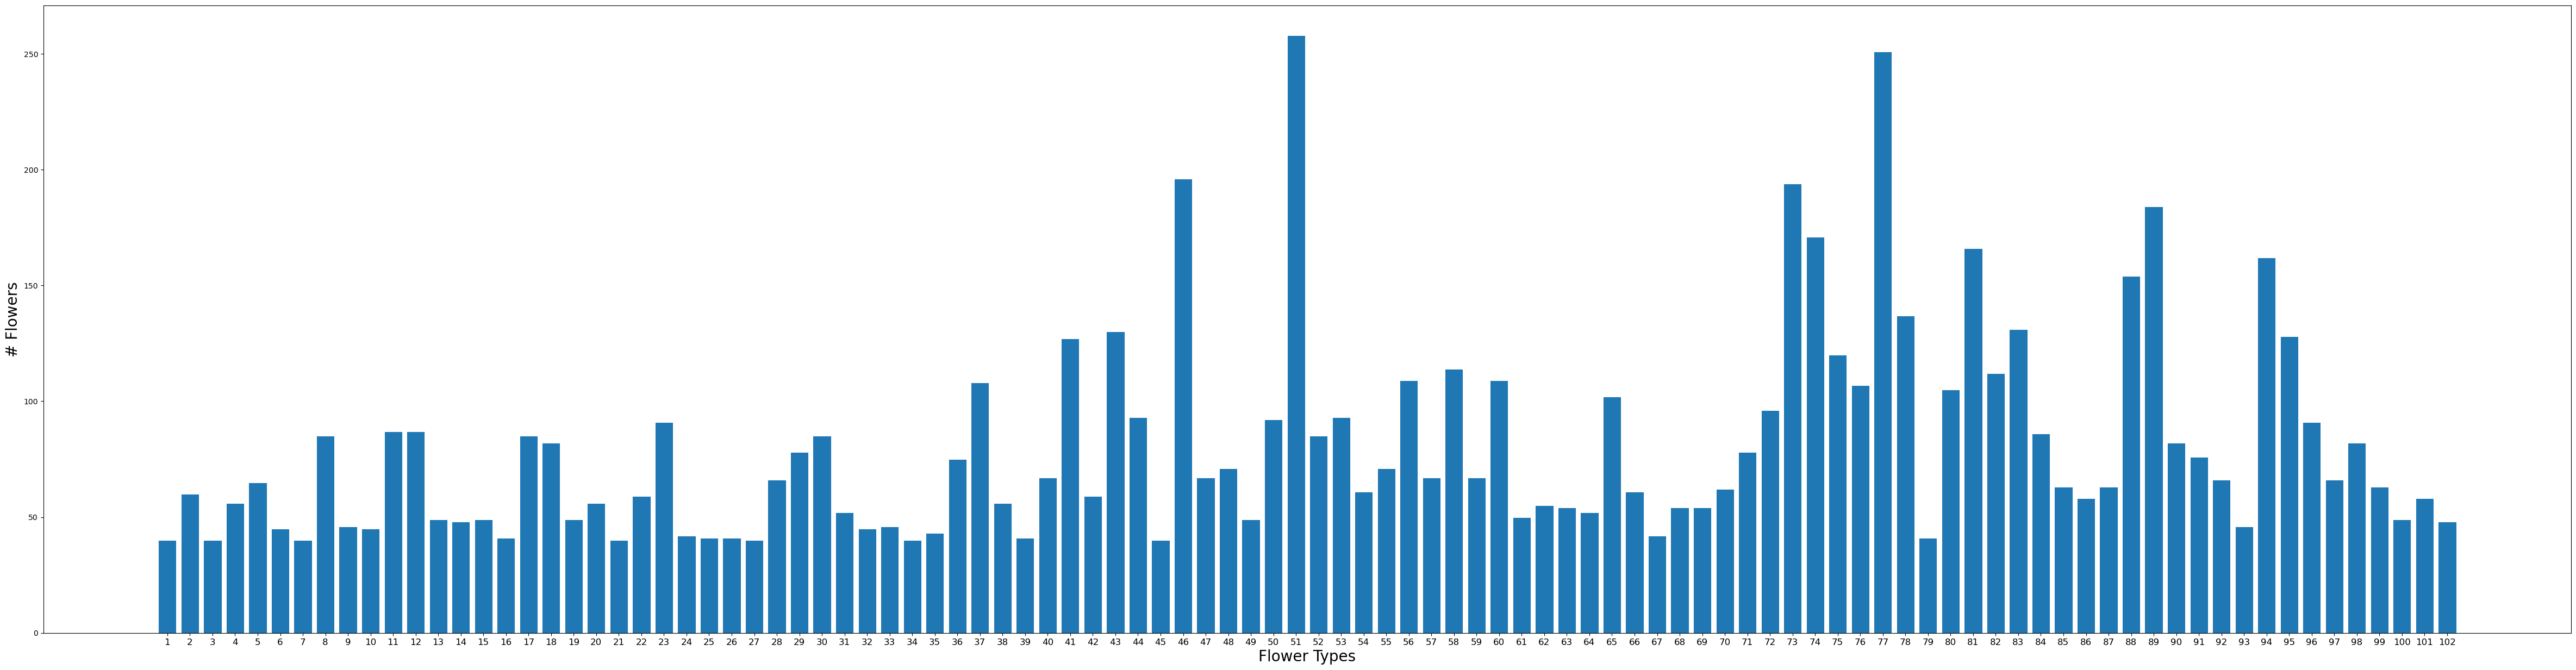

In [90]:
plot_labelcounts(labels['labels'][0])

## The data splits

In [79]:
setid = loadmat('./Data/setid.mat')
setid

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

By checking the min and max values of setid, we see that the indexes are counted from 1 to 8189. We will subtract the setid by 1 to match with Python starting from 0

In [100]:
print(setid['trnid'][0].min(), setid['trnid'][0].max(), len(setid['trnid'][0]))
print(setid['valid'][0].min(), setid['valid'][0].max(), len(setid['valid'][0]))
print(setid['tstid'][0].min(), setid['tstid'][0].max(), len(setid['tstid'][0]))

28 8177 1020
17 8187 1020
1 8189 6149


In [80]:
idx_train = setid['trnid'][0] - 1
idx_val = setid['valid'][0] - 1
idx_test = setid['tstid'][0] - 1

In [98]:
idx_train

array([6764, 6754, 6767, ..., 8025, 8035, 8040], dtype=uint16)

Getting labels for train, validation and test sets. The histograms show that there are 10 images for each flower type in the train and validation sets. Since there are 102 flower types, there are 1020 images in the train and validation sets. There rest of the images belong to the test set. 

In [81]:
label_train = labels['labels'][0][idx_train]
label_val = labels['labels'][0][idx_val]
label_test = labels['labels'][0][idx_test]

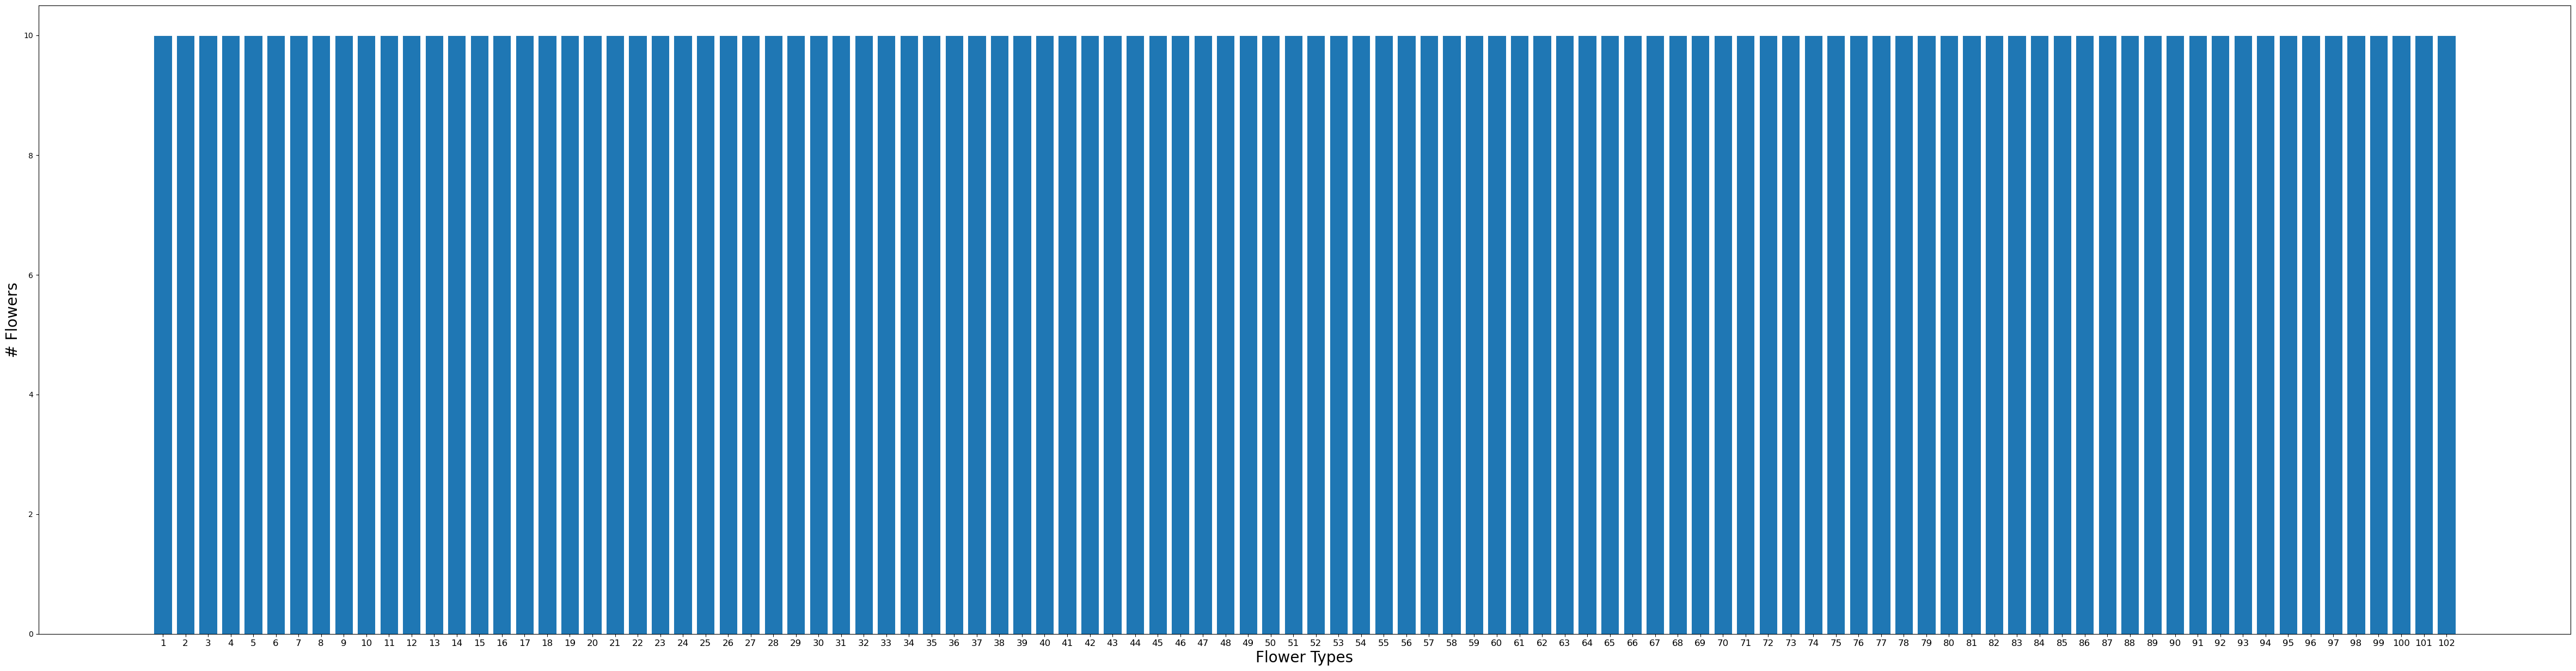

In [91]:
plot_labelcounts(label_train)

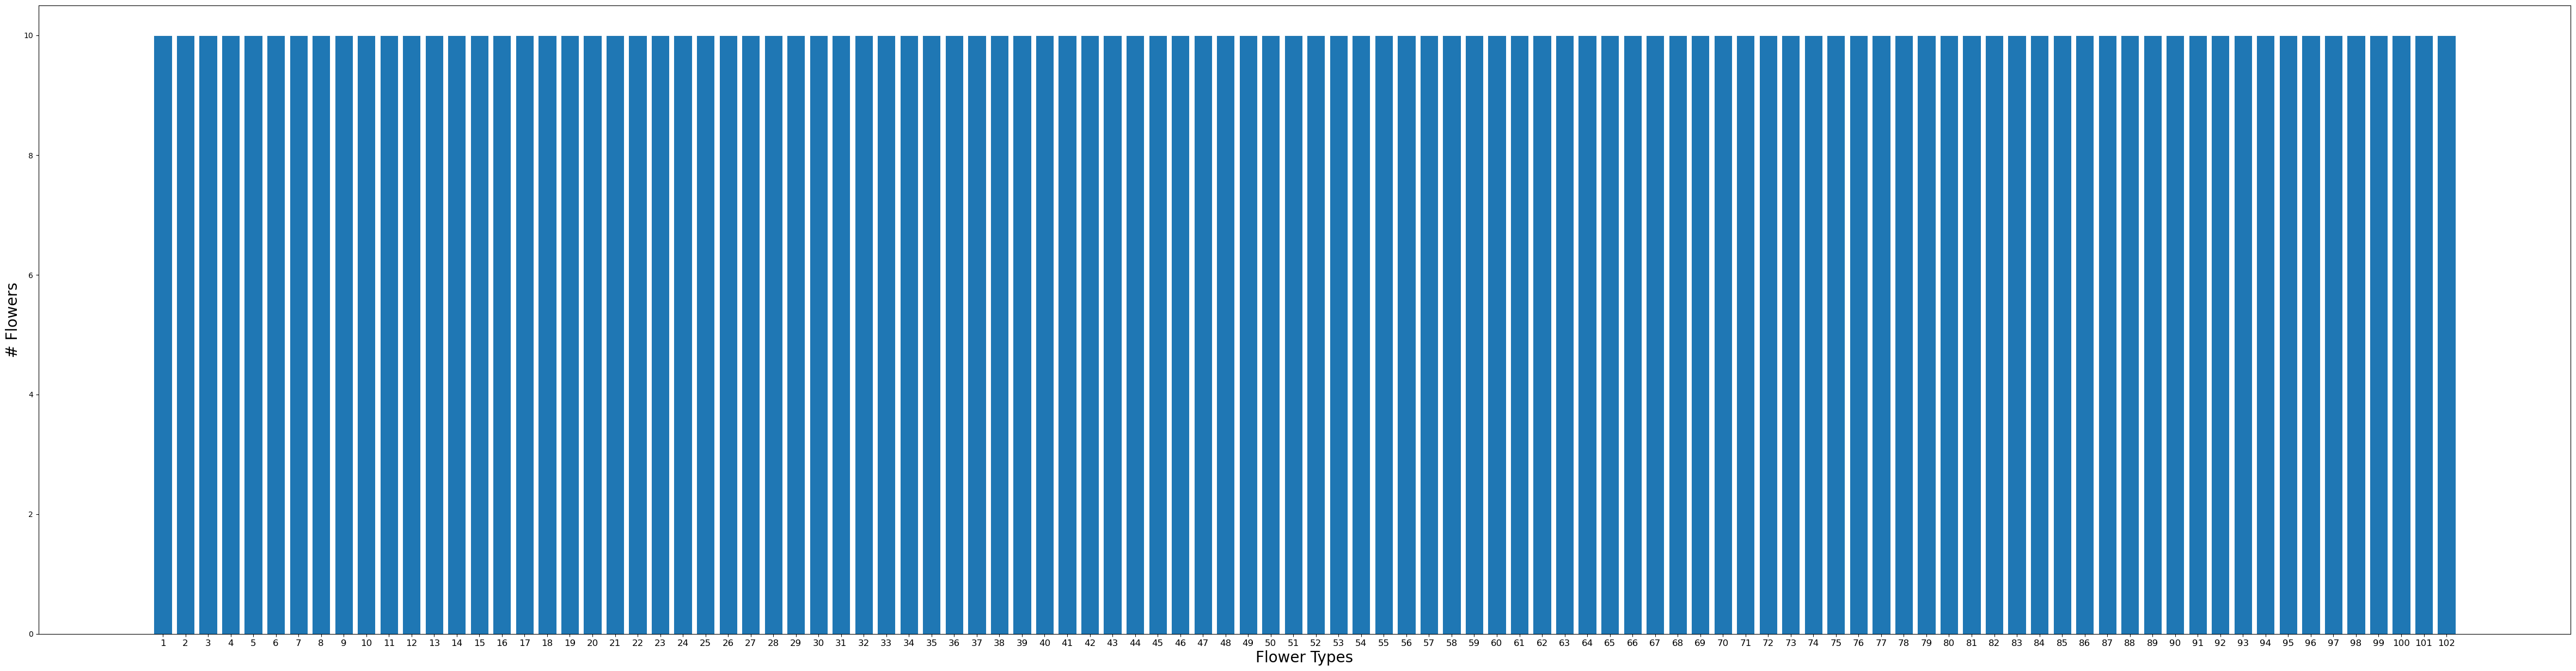

In [92]:
plot_labelcounts(label_val)

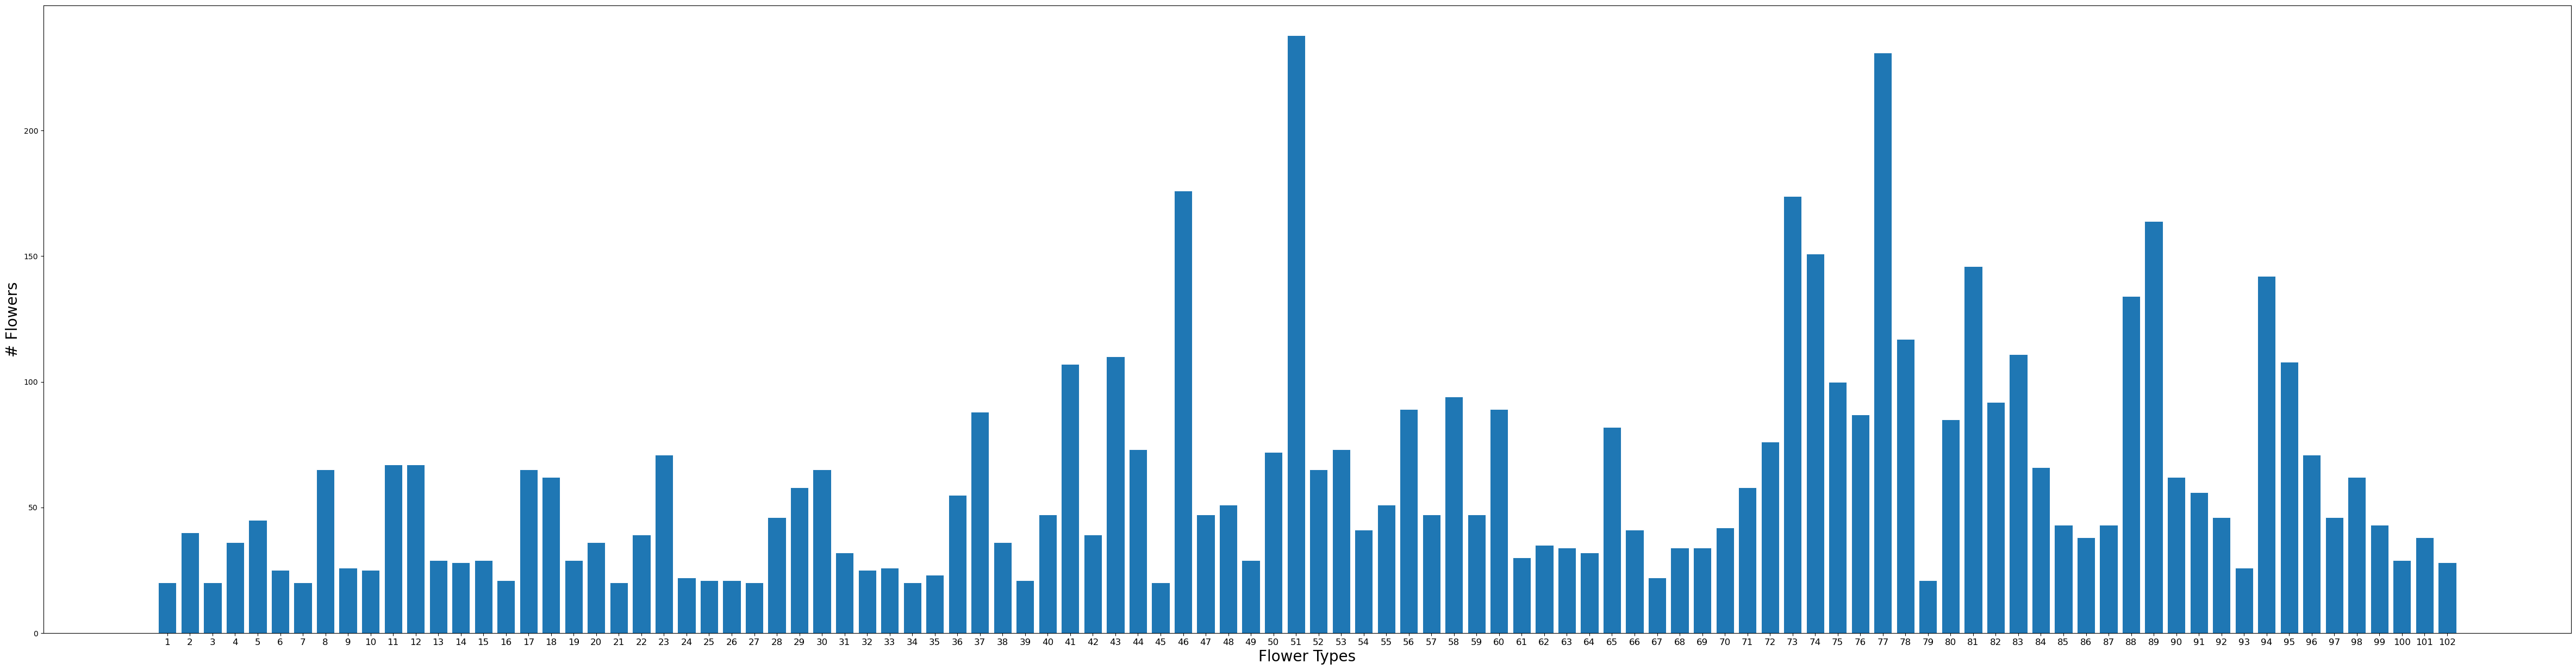

In [93]:
plot_labelcounts(label_test)

## The distance

In [12]:
distance = loadmat('./Data/distancematrices102.mat')
distance

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 23:34:52 2009',
 '__version__': '1.0',
 '__globals__': [],
 'Dsiftint': array([[0.        , 1.64716094, 1.85601516, ..., 1.75544945, 1.84912726,
         1.80309493],
        [1.64716094, 0.        , 1.88162833, ..., 1.73675125, 1.76682957,
         1.72410005],
        [1.85601516, 1.88162833, 0.        , ..., 1.85741757, 1.87918369,
         1.88531453],
        ...,
        [1.75544945, 1.73675125, 1.85741757, ..., 0.        , 1.52346245,
         1.54352209],
        [1.84912726, 1.76682957, 1.87918369, ..., 1.52346245, 0.        ,
         1.59574376],
        [1.80309493, 1.72410005, 1.88531453, ..., 1.54352209, 1.59574376,
         0.        ]]),
 'Dhsv': array([[0.        , 1.84613582, 1.21886359, ..., 1.60388786, 1.70990589,
         1.48176529],
        [1.84613582, 0.        , 1.96676115, ..., 1.97515981, 1.99763434,
         1.98014162],
        [1.21886359, 1.96676115, 0.        , ..., 1.8009989

In [14]:
len(distance['Dhog'])

8189

In [15]:
len(distance['Dhog'][0])

8189

## Dataset images

What we will do:
- Take a look at a few images using `matplotlib` and `OpenCV`
- Organize the images in the following structure. This will make it easy when training models.

- Train
    - Category 1
        - Image 1
        - Image 2
        - ...
    - Category 2
    - ...
    - Category 102
- Valid
    - Category 1
    - Category 2
    - ...
    - Category 102
- Test

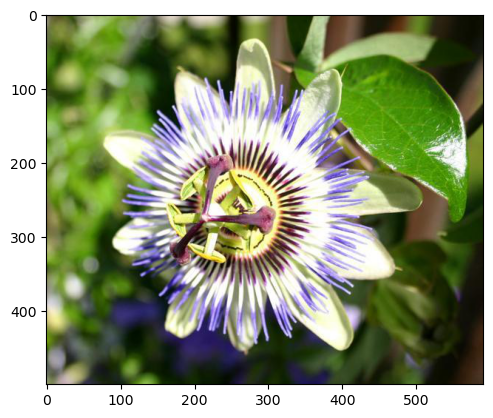

In [115]:
img = plt.imread('./Data/jpg/image_00001.jpg')
plt.imshow(img);

The image shape is:  (500, 591, 3)
The height of the image is:  500
The width of the image is:  591


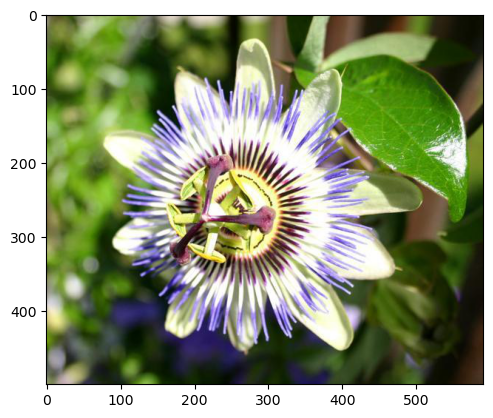

In [159]:
image = cv2.imread('./Data/jpg/image_00001.jpg')
print("The image shape is: ",image.shape)
height, width = image.shape[:2]
print("The height of the image is: ", height)
print("The width of the image is: ", width)
# Since OpenCV reads images with BGR format, you'd convert it to RGB format before pass the image to pyplot
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

### Put the image data into train, validation and test folders

In [132]:
images = sorted(glob('./Data/jpg/*.jpg'))
labeled = np.array([i for i in zip(images, labels['labels'][0])])
labeled

array([['./Data/jpg/image_00001.jpg', '77'],
       ['./Data/jpg/image_00002.jpg', '77'],
       ['./Data/jpg/image_00003.jpg', '77'],
       ...,
       ['./Data/jpg/image_08187.jpg', '62'],
       ['./Data/jpg/image_08188.jpg', '62'],
       ['./Data/jpg/image_08189.jpg', '62']], dtype='<U26')

In [133]:
labeled[idx_train]

array([['./Data/jpg/image_06765.jpg', '1'],
       ['./Data/jpg/image_06755.jpg', '1'],
       ['./Data/jpg/image_06768.jpg', '1'],
       ...,
       ['./Data/jpg/image_08026.jpg', '102'],
       ['./Data/jpg/image_08036.jpg', '102'],
       ['./Data/jpg/image_08041.jpg', '102']], dtype='<U26')

In [138]:
cwd = os.path.dirname(os.path.realpath('__file__'))
cwd

'/Users/user/Documents/Github/flowers'

In [148]:
NEWFOLDER = 'Data/Datasplit'
if os.path.exists(NEWFOLDER):
    rmtree(NEWFOLDER, ignore_errors=True)
os.mkdir(NEWFOLDER)

In [149]:
def move_files(dir_name, labeled):
    cur_dir_path = os.path.join(NEWFOLDER, dir_name)
    if not os.path.exists(cur_dir_path):
        os.mkdir(cur_dir_path)

    for i in range(1, 103):
        class_dir = os.path.join(NEWFOLDER, dir_name, str(i))
        os.mkdir(class_dir)

    for label in labeled:
        src = str(label[0])
        dst = os.path.join(cwd, NEWFOLDER, dir_name, label[1], src.split(os.sep)[-1])
        copyfile(src, dst)

move_files('train', labeled[idx_train, :])
move_files('valid', labeled[idx_valid, :])
move_files('test', labeled[idx_test, :])